# Análise de ETFs

## Objetivo
Criar duas ou três carterias hipotéticas com diferentes quantidades de ETFs e com estratégias diferentes, e comparar o seu desempenho.

## Habilidades
- Asset Allocation (Alocação de Ativos)
- Backtesting
- Análise de Risco
- Webscraping
- Diversificação

## O que é um ETF?

Um **ETF** (*Exchange-Traded Fund*), ou Fundo de Investimento em Exchange-Traded, é um tipo de fundo de investimento e produto negociado em bolsa de valores, com ações que são negociadas em bolsas de valores, semelhante a ações individuais. Os ETFs são projetados para acompanhar o desempenho de um índice específico, commodity, título ou um conjunto de ativos, e eles fornecem aos investidores exposição a uma carteira diversificada de ativos em um único investimento.

Aqui estão algumas características-chave dos ETFs:

1. **Diversificação**: Os ETFs normalmente mantêm uma carteira diversificada de ativos, que podem incluir ações, títulos, commodities ou outros instrumentos financeiros. Essa diversificação ajuda a espalhar o risco para os investidores.

2. **Liquidez**: Os ETFs são negociados em bolsas de valores ao longo do dia de negociação, assim como ações individuais. Isso fornece aos investidores liquidez, pois eles podem comprar ou vender ações de ETF a preços de mercado sempre que o mercado de ações estiver aberto.

3. **Transparência**: Os ETFs divulgam suas participações diariamente, permitindo que os investidores vejam exatamente quais ativos estão mantidos no fundo. Essa transparência pode ser útil para investidores que desejam entender a composição do fundo.

4. **Baixos Custos**: Os ETFs são conhecidos por terem taxas de despesas relativamente baixas em comparação com fundos mútuos. Isso pode torná-los uma opção atraente para investidores conscientes dos custos.

5. **Eficiência Fiscal**: Os ETFs são estruturados de uma maneira que pode ser eficiente do ponto de vista fiscal, pois podem ter menos distribuições de ganhos de capital em comparação com alguns fundos mútuos.

6. **Flexibilidade**: Os investidores podem usar ETFs para uma variedade de estratégias de investimento, incluindo investimento de longo prazo, negociação de curto prazo e proteção em uma carteira de investimentos.

7. **Desempenho de Mercado**: O valor de um ETF é baseado no desempenho dos ativos subjacentes que ele acompanha. Se o índice ou ativos subjacentes aumentarem de valor, o preço do ETF normalmente aumentará também.

Os ETFs se tornaram veículos de investimento populares para uma ampla gama de investidores, desde investidores individuais de varejo até investidores institucionais, devido à facilidade de acesso, aos benefícios de diversificação e à flexibilidade na construção de carteiras diversificadas. Eles são usados para vários fins, incluindo o acompanhamento do mercado de ações em geral, a obtenção de exposição a setores ou indústrias específicas e a gestão de riscos dentro de uma carteira de investimentos.


## Lista de ETFs negociados no Brasil:
https://br.investing.com/etfs/brazil-etfs

# Setup

In [6]:
%pip install pandas -q
%pip install beautifulsoup4 -q
%pip install yfinance -q
%pip install requests -q
%pip install selenium -q

%pip install --upgrade pandas beautifulsoup4 yfinance requests selenium


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.7.6 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Exception ignored in: <function Socket.__del__ at 0x000001BFB671F6D0>
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\zmq\sugar\socket.py", line 112, in __del__
    warn(
TypeError: issubclass() arg 2

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.7.6 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Exception ignored in: <function Socket.__del__ at 0x000001BFB671F6D0>
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\zmq\sugar\socket.py", line 112, in __del__
    warn(
TypeError: issubclass() arg 2

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.7.6 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Exception ignored in: <function Socket.__del__ at 0x000001BFB671F6D0>
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\zmq\sugar\socket.py", line 112, in __del__
    warn(
TypeError: issubclass() arg 2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.7.6 has a non-standard dependency specifier torch>=1.9.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Exception ignored in: <function Socket.__del__ at 0x000001BFB671F6D0>
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\zmq\sugar\socket.py", line 112, in __del__
    warn(
TypeError: issubclass() arg 2

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ce/cd/a7c2cbffe2afff975349e60b14b63a448162145a7acac8ba12ddc2ed78a8/pandas-2.1.1-cp310-cp310-win_amd64.whl.metadata
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/60/bf/70efe5138327c7ccf34f0a870ac97d41d3c06fecb2ec8dc2060ff39aadc9/yfinance-0.2.30-py2.py3-none-any.whl.metadata
  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/55/56/faf2aa238a0a8fbb7d5c11345a0f5e96358b7a3e144ba17b8b1c64f0b19a/selenium-4.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/50/ba/cb7bc9728a3be4e00dfd658fc76dc64fd9dbc3d5492ff44cda70574329c6/lxml-4.9.3-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb

## Bibliotecas

In [223]:
import pandas as pd
from bs4 import BeautifulSoup
import yfinance as yf
import requests
import numpy as np
import warnings
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

import investpy as inv
from collections import OrderedDict
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import CovarianceShrinkage, risk_models, expected_returns, objective_functions, plotting
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
import vectorbt as vbt

## Constantes

In [5]:
url = 'https://br.investing.com/etfs/brazil-etfs'

In [6]:
warnings.simplefilter(action='ignore')

# Extração de dados

## Primeira tentativa
Usando o Beautiful Soup

In [7]:
soup = BeautifulSoup(url, 'html.parser')

In [8]:
pd.read_html(str(soup))

HTTPError: HTTP Error 403: Forbidden

## Segunda Tentativa
Usando o método Requests

In [7]:
requests.get(url)

<Response [403]>

Também retornou a resposta 403, Forbidden. No Google Collab retorna 200 a resposta, mas no VSCODE rodando diretamente na minha máquina e rede local retorna Forbidden, pode ser algum problema relacionado à permissão de rede (a máquina do Collab por rodar em um domínio do Google tem acessos diferentes à um provedor de rede local como o meu). Vamos seguir com outro método abaixo (Selenium).

## Terceira Tentativa
Usando o Chrome Web Driver / Selenium. Este método é mais complexo, mais demorado, porém além de ser o único que funcionou entre os 3, é o que tem maior versatilidade na busca por elementos dentro de uma página.

In [9]:
driver_path = 'C:/webdriver/chromedriver.exe'

chrome_options = Options()
chrome_options.add_argument('--headless')


driver = webdriver.Chrome(executable_path=driver_path, options=chrome_options)

url = 'https://br.investing.com/etfs/brazil-etfs' 
driver.get(url)

driver.save_screenshot('../Analisando ETFs/screenshots/screenshot.png')

table_id = 'etfs'
table = driver.find_element(By.ID, table_id)


table_html = table.get_attribute('outerHTML')
df = pd.read_html(table_html)[0] 

print(df)

driver.quit()


     Unnamed: 0                                       Nome  Código   Último  \
0           NaN                       iShares Ibovespa ETF  BOVA11  11315.0   
1           NaN          iShares BM&FBOVESPA Small Cap ETF  SMAL11  10164.0   
2           NaN                        Trend ETF LBMA Ouro  GOLD11   9810.0   
3           NaN                        It Now Ibovespa ETF  BOVV11  11855.0   
4           NaN                        iShares S&P 500 ETF  IVVB11  23879.0   
..          ...                                        ...     ...      ...   
224         NaN               Xtrackers MSCI USA UCITS BDR  BEUA39      NaN   
225         NaN            Xtrackers MSCI Europe UCITS BDR  BEUR39      NaN   
226         NaN  Xtrackers MSCI Emerging Markets UCITS BDR  BEME39      NaN   
227         NaN  ETF Investo Teva Tesouro IPCA+ 0 a 4 Anos  NTNS11      NaN   
228         NaN             Xtrackers MSCI China UCITS BDR  BCHA39      NaN   

       Var%     Vol.   Hora  Unnamed: 7  
0    +0,8

In [10]:
df.head()

,Unnamed: 0,Nome,Código,Último,Var%,Vol.,Hora,Unnamed: 7
0,NaN,iShares Ibovespa ETF,BOVA11,11315.0,"+0,86%","4,24M",29/09,NaN
1,NaN,iShares BM&FBOVESPA Small Cap ETF,SMAL11,10164.0,"+0,48%","4,19M",29/09,NaN
2,NaN,Trend ETF LBMA Ouro,GOLD11,9810.0,"-1,21%","1,27M",29/09,NaN
3,NaN,It Now Ibovespa ETF,BOVV11,11855.0,"+0,71%","992,12K",29/09,NaN
4,NaN,iShares S&P 500 ETF,IVVB11,23879.0,"-0,29%","434,35K",29/09,NaN


In [11]:
df = df.iloc[:,1:7]

In [12]:
df.head()

,Nome,Código,Último,Var%,Vol.,Hora
0,iShares Ibovespa ETF,BOVA11,11315.0,"+0,86%","4,24M",29/09
1,iShares BM&FBOVESPA Small Cap ETF,SMAL11,10164.0,"+0,48%","4,19M",29/09
2,Trend ETF LBMA Ouro,GOLD11,9810.0,"-1,21%","1,27M",29/09
3,It Now Ibovespa ETF,BOVV11,11855.0,"+0,71%","992,12K",29/09
4,iShares S&P 500 ETF,IVVB11,23879.0,"-0,29%","434,35K",29/09


In [13]:
etfs = df

In [14]:
list(etfs['Código'])

['BOVA11',
 'SMAL11',
 'GOLD11',
 'BOVV11',
 'IVVB11',
 'NASD11',
 'HASH11',
 'BOVX11',
 'UTEC11',
 'USAL11',
 'PIBB11',
 'XINA11',
 'QBTC11',
 'LFTS11',
 'BIVB39',
 'QDFI11',
 'SPXI11',
 'ABGD39',
 'QETH11',
 'FIND11',
 'URET11',
 'ESGD11',
 'BTLT39',
 'BEWH39',
 'ESGU11',
 'BITH11',
 'DIVO11',
 'BBOV11',
 'IMAB11',
 'B5P211',
 'BIYW39',
 'BIHI39',
 'BIAU39',
 'BSLV39',
 'BIYE39',
 'SMAC11',
 'ETHE11',
 'TRIG11',
 'ACWI11',
 'ALUG11',
 'BBOI11',
 'ESGE11',
 'EURP11',
 'CORN11',
 'SHOT11',
 'GENB11',
 'BEEM39',
 'XFIX11',
 'WRLD11',
 'DNAI11',
 'TECK11',
 'BEWG39',
 'BURA39',
 'DEFI11',
 'MATB11',
 'BIWF39',
 'BOVB11',
 'CRPT11',
 'BITI11',
 'BEFV39',
 'BDVY39',
 'TECB11',
 'BEZU39',
 'USTK11',
 'SPXB11',
 'BIVE39',
 'BEMV39',
 'BSHY39',
 'BIEU39',
 'BIBB39',
 'WEB311',
 'BUSM39',
 'BIJH39',
 'IB5M11.',
 'BEGU39',
 'ISUS11',
 'USDB11',
 'BSHV39',
 'BRAX11',
 'BIYT39',
 'BLQD39',
 'BFAV39',
 'ELAS11',
 'BOVS11',
 'BIWM39',
 'BIJR39',
 'FIXA11',
 'BGWH39',
 'BSOX39',
 'GOVE11',
 'BGOV39'

# Extraindo os dados de cotações dos ETFs

In [15]:
etfs = yf.download([i + '.SA' for i in list(etfs['Código'])],start = '2023-01-01')['Close']

[*********************100%***********************]  229 of 229 completed

16 Failed downloads:
- BLUZ39.SA: No data found, symbol may be delisted
- BPFV39.SA: No data found, symbol may be delisted
- BEQW39.SA: No data found, symbol may be delisted
- BJAP39.SA: No data found, symbol may be delisted
- BFTS39.SA: No data found, symbol may be delisted
- SLXB39.SA: No data found, symbol may be delisted
- BSNS39.SA: No data found, symbol may be delisted
- BTWO39.SA: No data found, symbol may be delisted
- BEME39.SA: No data found, symbol may be delisted
- BWOR39.SA: No data found, symbol may be delisted
- BMIL39.SA: No data found, symbol may be delisted
- BUFF39.SA: No data found, symbol may be delisted
- BEUR39.SA: No data found, symbol may be delisted
- BEUA39.SA: No data found, symbol may be delisted
- IB5M11..SA: No data found, symbol may be delisted
- BCHA39.SA: No data found, symbol may be delisted


In [16]:
etfs.head()

,5GTK11.SA,ABGD39.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAAX39.SA,BACW39.SA,BAER39.SA,BBOI11.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,74.500000,NaN,9.34,44.400002,35.299999,76.760002,NaN,NaN,29.459999,NaN,...,8.54,95.019997,7.65,10.14,10.79,83.120003,105.570000,10.07,6.36,39.810001
2023-01-03 00:00:00,77.050003,NaN,9.53,43.000000,35.750000,76.660004,NaN,NaN,29.459999,NaN,...,8.67,97.790001,7.87,10.24,11.73,82.400002,102.459999,10.03,6.63,39.500000
2023-01-04 00:00:00,77.800003,NaN,9.59,43.639999,36.500000,76.589996,NaN,NaN,30.379999,NaN,...,8.69,97.750000,7.75,10.22,12.05,82.900002,103.580002,10.05,7.00,41.570000
2023-01-05 00:00:00,75.550003,NaN,9.36,44.090000,35.000000,76.629997,NaN,NaN,29.930000,NaN,...,8.46,96.620003,7.61,9.87,11.10,80.849998,105.800003,10.06,6.89,40.330002
2023-01-06 00:00:00,76.099998,NaN,9.36,44.290001,35.099998,76.830002,NaN,NaN,29.930000,NaN,...,8.44,94.970001,7.60,9.91,11.36,80.750000,107.059998,10.05,6.78,40.810001


Limpando os dados

In [17]:
etfs.dropna(axis = 1)

,5GTK11.SA,ACWI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,BCHQ39.SA,...,URET11.SA,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,74.500000,9.34,35.299999,76.760002,29.459999,54.799999,87.699997,36.650002,31.400000,27.290001,...,8.69,8.54,95.019997,7.65,10.14,10.79,83.120003,105.570000,10.07,6.36
2023-01-03,77.050003,9.53,35.750000,76.660004,29.459999,53.770000,85.849998,36.650002,33.400002,28.500000,...,8.83,8.67,97.790001,7.87,10.24,11.73,82.400002,102.459999,10.03,6.63
2023-01-04,77.800003,9.59,36.500000,76.589996,30.379999,54.480000,86.879997,36.650002,35.160000,30.299999,...,8.97,8.69,97.750000,7.75,10.22,12.05,82.900002,103.580002,10.05,7.00
2023-01-05,75.550003,9.36,35.000000,76.629997,29.930000,55.689999,87.699997,36.650002,34.910000,30.209999,...,8.59,8.46,96.620003,7.61,9.87,11.10,80.849998,105.800003,10.06,6.89
2023-01-06,76.099998,9.36,35.099998,76.830002,29.930000,56.080002,88.239998,36.650002,34.279999,29.370001,...,8.61,8.44,94.970001,7.60,9.91,11.36,80.750000,107.059998,10.05,6.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,72.980003,9.56,31.000000,83.959999,26.660000,59.970001,98.070000,39.689999,26.940001,22.230000,...,7.92,9.04,86.160004,9.34,12.25,10.72,82.400002,113.739998,11.41,5.36
2023-09-26,72.180000,9.46,30.459999,83.550003,30.350000,59.060001,97.050003,39.689999,26.820000,22.230000,...,7.84,8.91,86.489998,9.21,12.07,10.99,81.540001,112.059998,11.36,5.32
2023-09-27,73.400002,9.58,30.600000,83.449997,27.000000,59.119999,96.580002,39.689999,27.090000,22.230000,...,7.82,9.06,87.169998,9.34,12.26,10.89,82.699997,112.180000,11.35,5.39


Forma mais refinada de limpar missings. Através de um Data Quality com base em um threshold (vamos usar 90% neste caso)

In [18]:
etfs.isna().sum()

5GTK11.SA      0
ABGD39.SA    187
ACWI11.SA      0
AGRI11.SA      2
ALUG11.SA      0
            ... 
WRLD11.SA      0
XBOV11.SA      0
XFIX11.SA      0
XINA11.SA      0
YDRO11.SA      1
Length: 229, dtype: int64

In [19]:
etfs.shape[0]

188

In [20]:
etfs.isna().sum()/etfs.shape[0]

5GTK11.SA    0.000000
ABGD39.SA    0.994681
ACWI11.SA    0.000000
AGRI11.SA    0.010638
ALUG11.SA    0.000000
               ...   
WRLD11.SA    0.000000
XBOV11.SA    0.000000
XFIX11.SA    0.000000
XINA11.SA    0.000000
YDRO11.SA    0.005319
Length: 229, dtype: float64

In [21]:
fg_etfs_integros = etfs.isna().sum()/etfs.shape[0] < 0.9

In [22]:
etfs.columns[fg_etfs_integros]

Index(['5GTK11.SA', 'ACWI11.SA', 'AGRI11.SA', 'ALUG11.SA', 'B5P211.SA',
       'BAER39.SA', 'BBOV11.SA', 'BBSD11.SA', 'BBUG39.SA', 'BCHI39.SA',
       ...
       'USAL11.SA', 'USDB11.SA', 'USTK11.SA', 'UTEC11.SA', 'WEB311.SA',
       'WRLD11.SA', 'XBOV11.SA', 'XFIX11.SA', 'XINA11.SA', 'YDRO11.SA'],
      dtype='object', length=148)

In [23]:
etfs_filtrados = etfs[etfs.columns[fg_etfs_integros]]

In [24]:
etfs_filtrados.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,74.500000,9.34,44.400002,35.299999,76.760002,29.459999,54.799999,87.699997,36.650002,31.400000,...,8.54,95.019997,7.65,10.14,10.79,83.120003,105.570000,10.07,6.36,39.810001
2023-01-03 00:00:00,77.050003,9.53,43.000000,35.750000,76.660004,29.459999,53.770000,85.849998,36.650002,33.400002,...,8.67,97.790001,7.87,10.24,11.73,82.400002,102.459999,10.03,6.63,39.500000
2023-01-04 00:00:00,77.800003,9.59,43.639999,36.500000,76.589996,30.379999,54.480000,86.879997,36.650002,35.160000,...,8.69,97.750000,7.75,10.22,12.05,82.900002,103.580002,10.05,7.00,41.570000
2023-01-05 00:00:00,75.550003,9.36,44.090000,35.000000,76.629997,29.930000,55.689999,87.699997,36.650002,34.910000,...,8.46,96.620003,7.61,9.87,11.10,80.849998,105.800003,10.06,6.89,40.330002
2023-01-06 00:00:00,76.099998,9.36,44.290001,35.099998,76.830002,29.930000,56.080002,88.239998,36.650002,34.279999,...,8.44,94.970001,7.60,9.91,11.36,80.750000,107.059998,10.05,6.78,40.810001


Preencher os missings. Usar o foward filling, projetando com um dado do passado um dado futuro para reduzir viéses 

In [25]:
etfs_filtrados_semmissing = etfs_filtrados.ffill(axis = 0)

In [26]:
etfs_filtrados_semmissing.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,74.500000,9.34,44.400002,35.299999,76.760002,29.459999,54.799999,87.699997,36.650002,31.400000,...,8.54,95.019997,7.65,10.14,10.79,83.120003,105.570000,10.07,6.36,39.810001
2023-01-03 00:00:00,77.050003,9.53,43.000000,35.750000,76.660004,29.459999,53.770000,85.849998,36.650002,33.400002,...,8.67,97.790001,7.87,10.24,11.73,82.400002,102.459999,10.03,6.63,39.500000
2023-01-04 00:00:00,77.800003,9.59,43.639999,36.500000,76.589996,30.379999,54.480000,86.879997,36.650002,35.160000,...,8.69,97.750000,7.75,10.22,12.05,82.900002,103.580002,10.05,7.00,41.570000
2023-01-05 00:00:00,75.550003,9.36,44.090000,35.000000,76.629997,29.930000,55.689999,87.699997,36.650002,34.910000,...,8.46,96.620003,7.61,9.87,11.10,80.849998,105.800003,10.06,6.89,40.330002
2023-01-06 00:00:00,76.099998,9.36,44.290001,35.099998,76.830002,29.930000,56.080002,88.239998,36.650002,34.279999,...,8.44,94.970001,7.60,9.91,11.36,80.750000,107.059998,10.05,6.78,40.810001


In [27]:
etfs_filtrados_semmissing.isna().sum().sum()

4

Limpando a primeira linha

In [28]:
etfs_filtrados_semmissing_v2 = etfs_filtrados.ffill(axis = 0)

In [29]:
etfs_filtrados_semmissing_v2 = etfs_filtrados_semmissing_v2.drop(etfs_filtrados_semmissing_v2.index[0])

In [30]:
etfs_filtrados_semmissing_v2.isna().sum().sum()

0

In [31]:
etfs_limpos = etfs_filtrados_semmissing_v2

Note que agora a quantidade de NaN é 0 agora!!!

# Análises de desempenho

## Normalizando os dados

In [32]:
etfs_norm = etfs_limpos/etfs_limpos.iloc[0]

In [33]:
etfs_norm.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-01-04 00:00:00,1.009734,1.006296,1.014884,1.020979,0.999087,1.031229,1.013204,1.011998,1.0,1.052695,...,1.002307,0.999591,0.984752,0.998047,1.027281,1.006068,1.010931,1.001994,1.055807,1.052405
2023-01-05 00:00:00,0.980532,0.982162,1.025349,0.979021,0.999609,1.015954,1.035708,1.021549,1.0,1.045210,...,0.975779,0.988036,0.966963,0.963867,0.946292,0.981189,1.032598,1.002991,1.039216,1.021013
2023-01-06 00:00:00,0.987670,0.982162,1.030000,0.981818,1.002218,1.015954,1.042961,1.027839,1.0,1.026347,...,0.973472,0.971163,0.965693,0.967773,0.968457,0.979976,1.044896,1.001994,1.022624,1.033165
2023-01-09 00:00:00,1.001947,0.989507,1.035349,0.986294,1.003652,1.015954,1.048354,1.036925,1.0,1.028443,...,0.980392,0.979343,0.984752,0.985352,1.040068,0.987864,1.046067,0.997009,1.031674,1.063544


In [34]:
etfs_norm.iloc[-1].sort_values(ascending = False).head(10)

QBTC11.SA    1.544627
TECK11.SA    1.543230
BITH11.SA    1.500000
HASH11.SA    1.417721
QETH11.SA    1.331111
BIYW39.SA    1.325724
TECB11.SA    1.310898
GENB11.SA    1.302839
ETHE11.SA    1.272727
BURA39.SA    1.246988
Name: 2023-09-29 00:00:00, dtype: float64

In [35]:
top10_etfs = list(etfs_norm.iloc[-1].sort_values(ascending = False).head(10).index)

In [36]:
top10_etfs_df = yf.download(top10_etfs, start='2023-01-01')['Close']

[*********************100%***********************]  10 of 10 completed


In [37]:
top10_etfs_df_norm = top10_etfs_df/top10_etfs_df.iloc[0]

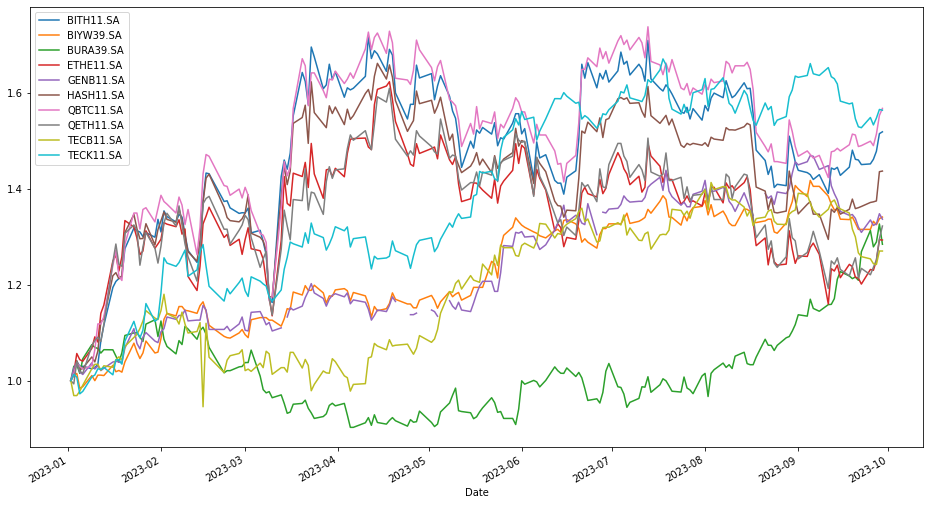

In [38]:
top10_etfs_df_norm.plot(figsize = (16,9));

In [39]:
etfs_norm[top10_etfs]

,QBTC11.SA,TECK11.SA,BITH11.SA,HASH11.SA,QETH11.SA,BIYW39.SA,TECB11.SA,GENB11.SA,ETHE11.SA,BURA39.SA
Date,,,,,,,,,,
2023-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-01-04,1.021858,0.994278,1.027358,1.027848,1.046667,1.003512,1.000000,1.012618,1.039937,1.003012
2023-01-05,1.014572,0.959949,1.017453,1.009494,1.026667,0.972783,1.009615,0.992114,1.027325,0.985761
2023-01-06,1.009108,0.965035,1.017453,1.012658,1.022222,0.976295,1.022436,0.987382,1.024172,1.015334
2023-01-09,1.016393,0.994596,1.012264,1.035443,1.080000,0.999122,1.057692,1.011041,1.050447,1.043812
...,...,...,...,...,...,...,...,...,...,...
2023-09-25,1.477231,1.528290,1.433962,1.353164,1.228889,1.300263,1.294071,1.301262,1.212296,1.274918
2023-09-26,1.468124,1.513032,1.443396,1.354430,1.244444,1.316945,1.283654,1.290221,1.210720,1.241785
2023-09-27,1.491803,1.527019,1.459906,1.356329,1.260000,1.309921,1.282051,1.293375,1.230688,1.251643


## Quais são os ETFs mais negociados no Brasil, na média? (analise de liquidez)

In [40]:
etfs_norm.columns

Index(['5GTK11.SA', 'ACWI11.SA', 'AGRI11.SA', 'ALUG11.SA', 'B5P211.SA',
       'BAER39.SA', 'BBOV11.SA', 'BBSD11.SA', 'BBUG39.SA', 'BCHI39.SA',
       ...
       'USAL11.SA', 'USDB11.SA', 'USTK11.SA', 'UTEC11.SA', 'WEB311.SA',
       'WRLD11.SA', 'XBOV11.SA', 'XFIX11.SA', 'XINA11.SA', 'YDRO11.SA'],
      dtype='object', length=148)

In [41]:
volumes = yf.download(list(etfs_norm.columns), start = '2023-01-01')['Volume']

[******                12%                       ]  18 of 148 completed

[*********************100%***********************]  148 of 148 completed


Limpando os dados faltantes

In [42]:
volumes.isna().sum().sum()

284

In [43]:
volumes_fill_nan = volumes.ffill(axis = 0)

In [44]:
volumes_fill_nan.isna().sum().sum()

4

In [45]:
volumes_fill_nan = volumes_fill_nan.drop(volumes_fill_nan.index[0])

In [46]:
volumes_fill_nan.isna().sum().sum()

0

Media dos volumes (média pode ser enviesada, testar outros métodos depois)

In [47]:
volumes_fill_nan.mean().sort_values(ascending = False)

BOVA11.SA    6.877043e+06
SMAL11.SA    2.329181e+06
BOVV11.SA    1.648690e+06
GOLD11.SA    1.136607e+06
BOVX11.SA    9.631152e+05
                 ...     
BICL39.SA    8.352941e+00
BIYG39.SA    4.967914e+00
BSIZ39.SA    2.465241e+00
BHEF39.SA    1.556150e+00
BIXG39.SA    9.572193e-01
Length: 148, dtype: float64

In [48]:
top10_etfs_volumes = list(volumes_fill_nan.mean().sort_values(ascending = False).head(10).index)

In [49]:
#lista com top 10 etfs por valorização
top10_etfs
#lista com top 10 etfs por volume
top10_etfs_volumes

['BOVA11.SA',
 'SMAL11.SA',
 'BOVV11.SA',
 'GOLD11.SA',
 'BOVX11.SA',
 'NASD11.SA',
 'XINA11.SA',
 'IVVB11.SA',
 'HASH11.SA',
 'USAL11.SA']

In [50]:
volumes_top_10_etfs = volumes[top10_etfs_volumes]

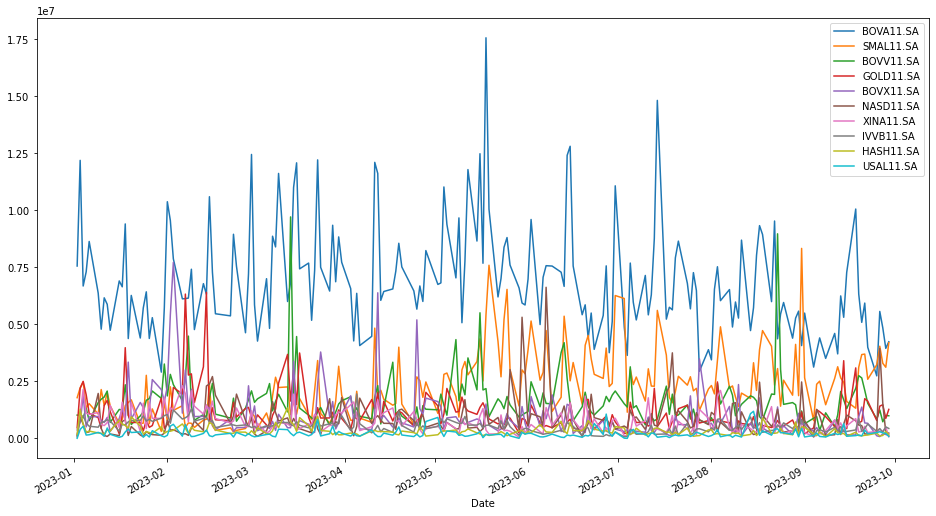

In [51]:
volumes_top_10_etfs.plot(figsize = (16,9));

In [52]:
volumes_top_10_etfs_norm =  volumes_top_10_etfs/volumes_top_10_etfs.iloc[0]

In [53]:
volumes_top_10_etfs_norm.head()

,BOVA11.SA,SMAL11.SA,BOVV11.SA,GOLD11.SA,BOVX11.SA,NASD11.SA,XINA11.SA,IVVB11.SA,HASH11.SA,USAL11.SA
Date,,,,,,,,,,
2023-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-01-03,1.613096,1.243259,0.996785,4.744157,1.889012,13.248984,7.028225,6.473023,7.534894,108.525485
2023-01-04,0.884049,1.389621,0.880973,5.404447,5.113931,9.123534,14.372758,7.696318,3.648992,147.111911
2023-01-05,0.966296,0.753564,1.296176,4.139692,1.370730,3.657829,7.426369,5.155189,1.544309,40.436011
2023-01-06,1.142537,0.852590,0.761004,2.371737,2.550276,4.112871,7.006360,4.095002,1.883174,44.060388


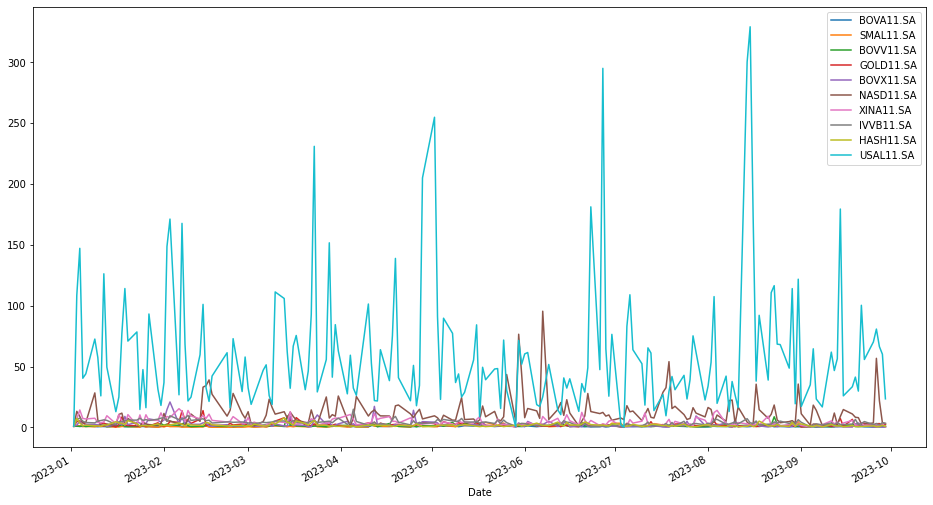

In [54]:
volumes_top_10_etfs_norm.plot(figsize = (16,9));

Há uma distorção pelo volume de negociação do USAL11, o que isso representa?

In [55]:
volumes['USAL11.SA'].head()

Date
2023-01-02      3610
2023-01-03    391777
2023-01-04    531074
2023-01-05    145974
2023-01-06    159058
Name: USAL11.SA, dtype: int64

In [56]:
volumes_top_10_etfs_norm.describe()

,BOVA11.SA,SMAL11.SA,BOVV11.SA,GOLD11.SA,BOVX11.SA,NASD11.SA,XINA11.SA,IVVB11.SA,HASH11.SA,USAL11.SA
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,0.910232,1.303725,1.613337,2.448998,2.605676,12.193748,4.815188,4.113272,1.935119,60.401498
std,0.316088,0.799998,1.112821,1.914423,2.813499,12.317764,3.290347,2.072555,1.225469,53.399538
min,0.362646,0.160041,0.336398,0.425242,0.215519,1.000000,0.350860,0.447643,0.435145,0.099169
25%,0.702008,0.738816,0.992160,1.352162,1.022033,5.182361,2.300682,2.714516,1.137605,26.364058
50%,0.855239,1.206592,1.393400,1.886699,1.821817,9.194984,3.748957,4.027789,1.622736,46.869391
75%,1.018364,1.686831,1.877908,2.918704,2.988925,14.485616,6.631312,5.331375,2.191431,71.983726
max,2.324407,4.669820,9.524838,13.845513,20.951966,95.484236,15.441291,14.985255,7.873371,329.034349


Apesar de atípico o baixo volume, foi constatado que realmente o ETF teve baixa negociação neste dia na bolsa em fontes distintas. Há dias próximo de feriados em que os volumes de negociações são pequenos, por isso é importante tomar cuidado com a utilização de volume negociado, e a variação deste indicador dia a dia (mesmo que normalizado, como é este caso). Ainda é possível que exista um viés nos dados. Vamos remover o USAL11 por demonstrar uma altíssima volatilidade no volume transacionado, essa volatilidade pode impactar diretamente o risco dado que isso está diretamente ligado à liquidez do ativo. Neste caso buscamos ativos com alta liquidez e baixa volatilidade no volume negociado.

In [57]:
desempenhos_top10_etfs_volumes = etfs_norm[top10_etfs_volumes]

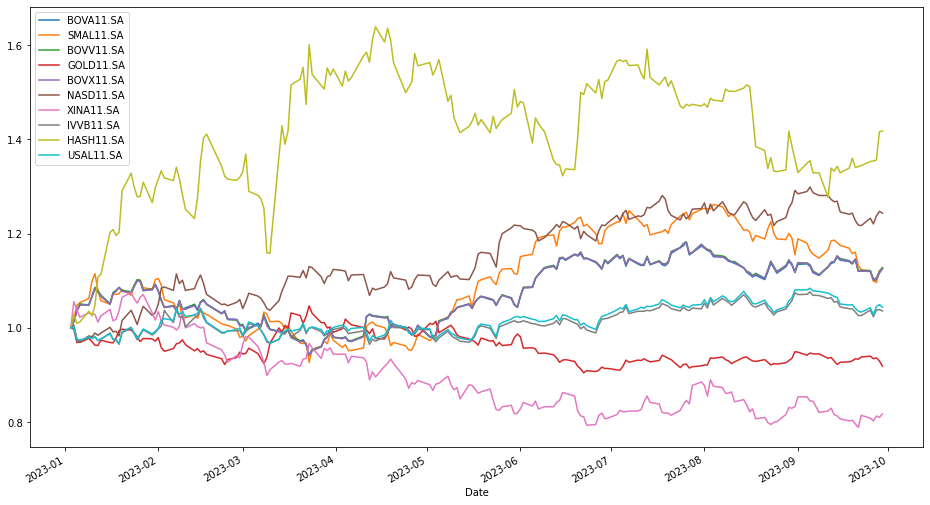

In [58]:
desempenhos_top10_etfs_volumes.plot(figsize=(16,9));

## Removendo ETFs com alta volatilidade

Para encontrar os ETFs com alta volatilidade vamos criar um filtro usando o desvio padrão do volume negociado dos ativos.
Primeiro, será necessário normalizar os dados de volume de todos os ETFs, verificar os valores de minimo e máximo dos dados normalizados e do desvio padrão e assim definir uma faixa aceitável de volatilidade. Além disso é necessário levar em conta o volume negociado (não adianta o ETF ter pouca volatilidade mas baixo volume). Um ETF com baixo volume tem baixa liquidez.

In [59]:
volumes_fill_nan.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,19,1644976,3656.0,36280,3696,0,4558,359,0,113667,...,391777,42,17537,522983,1480,18015,12,8449,1049827,33.0
2023-01-04,102,8201,3165.0,5234,3910,4,402165,42,0,429148,...,531074,68,4074,10969,263,3691,6039,12303,2146902,15.0
2023-01-05,1000,81754,113.0,9596,813,8,5197,76,0,16562,...,145974,174,1289,260627,40,6561,60,3082,1109299,10.0
2023-01-06,5048,89779,429.0,919,773,65,5978,384,0,89217,...,159058,53,3292,423330,113,3157,44,5859,1046561,784.0
2023-01-09,2053,27027,6.0,1256,3846,0,208304,156,0,48759,...,262070,137,246742,196084,782,6136,274,28998,1134146,1463.0


In [60]:
volumes_fill_nan_norm = volumes_fill_nan/volumes_fill_nan.iloc[0]

Primeiro vamos verificar se existem aitvos sem desvio padrão (NaN). E remover esses ativos

In [61]:
resumo = volumes_fill_nan_norm.describe()

desvios_padrao = resumo.loc['std']

colunas_com_nan_std = desvios_padrao[desvios_padrao.isna()].index.tolist()

In [62]:
colunas_com_nan_std

['BAER39.SA',
 'BBUG39.SA',
 'BCPX39.SA',
 'BCWV39.SA',
 'BDRI39.SA',
 'BDVD39.SA',
 'BEFG39.SA',
 'BEGE39.SA',
 'BEMV39.SA',
 'BFNX39.SA',
 'BHEF39.SA',
 'BICL39.SA',
 'BIWF39.SA',
 'BIYG39.SA',
 'BOEF39.SA',
 'BSDV39.SA',
 'BSIL39.SA',
 'BSIZ39.SA',
 'BXTC39.SA']

In [63]:
volumes_fill_nan = volumes_fill_nan.drop(columns=colunas_com_nan_std)

In [64]:
volumes_fill_nan.describe()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BBOV11.SA,BBSD11.SA,BCHI39.SA,BCHQ39.SA,BCLO39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
count,187.000000,1.870000e+02,187.000000,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,...,1.870000e+02,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,1.870000e+02,187.000000
mean,789.743316,8.285772e+04,4496.877005,5456.625668,14323.855615,1.744851e+05,712.181818,27712.807487,4758.171123,57.828877,...,2.191961e+05,333.112299,15368.855615,1.267674e+05,1001.288770,10242.754011,1084.390374,16148.572193,7.223066e+05,2413.016043
std,2424.093991,1.828095e+05,18204.502180,6100.615373,15071.408522,3.241851e+05,3117.316641,61177.569980,33185.994065,215.483484,...,1.926458e+05,354.055966,60785.688942,1.646157e+05,1194.717307,18432.834826,4542.625196,11185.092976,4.910242e+05,4464.282782
min,1.000000,9.550000e+02,3.000000,523.000000,773.000000,4.500000e+02,3.000000,4.000000,0.000000,0.000000,...,3.580000e+02,6.000000,190.000000,1.000000e+02,1.000000,904.000000,10.000000,2946.000000,5.240900e+04,2.000000
25%,34.000000,1.911950e+04,35.500000,1994.000000,6392.000000,1.892400e+04,56.500000,790.500000,0.000000,0.000000,...,9.561850e+04,111.000000,1699.500000,3.068300e+04,289.000000,3423.000000,17.500000,8434.000000,3.481695e+05,238.000000
50%,135.000000,3.433300e+04,100.000000,3453.000000,9375.000000,3.540900e+04,105.000000,4564.000000,5.000000,5.000000,...,1.696280e+05,217.000000,4019.000000,9.742000e+04,597.000000,6199.000000,36.000000,13104.000000,5.614380e+05,772.000000
75%,373.500000,7.623700e+04,303.000000,6083.500000,17122.500000,1.419545e+05,245.500000,25312.000000,10.000000,11.000000,...,2.605975e+05,396.500000,10108.500000,1.747095e+05,1233.500000,10236.500000,107.500000,20861.000000,9.939500e+05,1832.000000
max,21609.000000,1.644976e+06,197306.000000,42806.000000,114036.000000,1.729071e+06,28098.000000,448386.000000,365603.000000,1700.000000,...,1.187814e+06,2947.000000,749293.000000,1.638850e+06,8825.000000,186095.000000,41026.000000,72055.000000,2.306512e+06,26827.000000


In [65]:
volumes_fill_nan_norm = volumes_fill_nan/volumes_fill_nan.iloc[0]

In [66]:
volumes_fill_nan_norm.describe()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BBOV11.SA,BBSD11.SA,BCHI39.SA,BCHQ39.SA,BCLO39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,41.565438,0.050370,1.229999,0.150403,3.875502,38.281072,1.983793,0.243807,1189.542781,0.310908,...,0.559492,7.931245,0.876367,0.242393,0.676546,0.568568,90.365865,1.911300,0.688024,73.121698
std,127.583894,0.111132,4.979350,0.168154,4.077762,71.124420,8.683333,0.538218,8296.498516,1.158513,...,0.491723,8.429904,3.466140,0.314763,0.807241,1.023194,378.552100,1.323836,0.467719,135.281296
min,0.052632,0.000581,0.000821,0.014416,0.209145,0.098728,0.008357,0.000035,0.000000,0.000000,...,0.000914,0.142857,0.010834,0.000191,0.000676,0.050180,0.833333,0.348680,0.049922,0.060606
25%,1.789474,0.011623,0.009710,0.054961,1.729437,4.151821,0.157382,0.006955,0.000000,0.000000,...,0.244064,2.642857,0.096909,0.058669,0.195270,0.190008,1.458333,0.998225,0.331645,7.212121
50%,7.105263,0.020871,0.027352,0.095176,2.536526,7.768539,0.292479,0.040152,1.250000,0.026882,...,0.432971,5.166667,0.229173,0.186278,0.403378,0.344102,3.000000,1.550953,0.534791,23.393939
75%,19.657895,0.046345,0.082877,0.167682,4.632711,31.144032,0.683844,0.222686,2.500000,0.059140,...,0.665168,9.440476,0.576410,0.334063,0.833446,0.568221,8.958333,2.469050,0.946775,55.515152
max,1137.315789,1.000000,53.967724,1.179879,30.853896,379.348618,78.267409,3.944733,91400.750000,9.139785,...,3.031863,70.166667,42.726407,3.133658,5.962838,10.330003,3418.833333,8.528228,2.197040,812.939394


Agora vamos ordenar a lista pelos desvios padrões. Note que não pode aparecer mais ativos NaN no final da lista.

In [67]:
volumes_fill_nan_norm.describe().loc['std'].sort_values(ascending = False)

BFAV39.SA    24937.166166
BQYL39.SA    10327.343334
BCHQ39.SA     8296.498516
CMDB11.SA     4387.129729
BMTU39.SA     4012.362896
                 ...     
BVLU39.SA        0.161559
ACWI11.SA        0.111132
BURT39.SA        0.107926
BIXG39.SA        0.074191
BSUS39.SA        0.073124
Name: std, Length: 129, dtype: float64

Para avançar na análise precisamos definir qual faixa de desvio padrão é aceitável na nossa lista.
A faixa de desvio padrão aceitável para a volatilidade de um ativo com base em seu volume de negociação pode variar dependendo dos objetivos e das estratégias de investimento de cada investidor. Não existe uma faixa única e universalmente aceitável, pois a tolerância à volatilidade varia de pessoa para pessoa.
No entanto, os investidores geralmente consideram algumas diretrizes gerais ao avaliar a volatilidade com base no volume de negociação de um ativo:
- **Volatilidade Histórica**: É comum olhar para a volatilidade histórica do ativo, que é calculada com base nos preços passados do ativo. O desvio padrão dos retornos diários é um indicador comum de volatilidade histórica. A faixa aceitável pode depender do tipo de ativo (por exemplo, ações, títulos, moedas) e das preferências de risco do investidor.

- **Comparação com o Mercado**: Os investidores muitas vezes comparam a volatilidade de um ativo com a volatilidade do mercado em geral. Se um ativo é muito mais volátil do que o mercado de referência, isso pode ser visto como arriscado.

- **Objetivos de Investimento**: Os objetivos de investimento de um indivíduo desempenham um papel importante na determinação da faixa aceitável de volatilidade. Por exemplo, investidores de longo prazo podem ser mais tolerantes à volatilidade do que traders de curto prazo.

- **Diversificação**: A diversificação de portfólio pode ajudar a reduzir o risco global. Portanto, mesmo se um ativo individual for volátil, a inclusão em um portfólio diversificado pode ser aceitável.

Para quantificar estes conceitos, vamos utilizar o cálculo do beta (que mede a sensibilidade de um ativo em relação ao mercado).

## O que é o beta?
O beta é uma medida de sensibilidade de um ativo financeiro (como uma ação) em relação a movimentos no mercado mais amplo, geralmente representado pelo índice de referência, como o índice S&P 500. Ele ajuda a quantificar o risco sistemático associado a um ativo em comparação com o mercado em geral.

O cálculo do beta envolve os seguintes passos:

- **Coleta de Dados**: Você precisará dos dados de preço histórico do ativo em questão e do índice de referência (por exemplo, o S&P 500) para o mesmo período de tempo. Normalmente, você obtém dados diários de preço de fechamento.

- **Cálculo dos Retornos**: Calcule os retornos diários para o ativo e o índice. O retorno diário é a variação percentual no preço de fechamento em relação ao dia anterior. 

- **Cálculo da Covariância**: Calcule a covariância entre os retornos do ativo e os retornos do índice. A covariância mede como os retornos do ativo e do índice variam juntos.

- **Cálculo da Variância do Índice**: Calcule a variância dos retornos do índice. A variância mede a dispersão dos retornos do índice em relação à sua média.

- **Cálculo do Beta**: O beta é calculado dividindo a covariância pelo quadrado da variância do índice. Beta = Covariância / Variância do Índice

O beta resultante indica a sensibilidade do ativo em relação ao mercado. Se o beta for maior que 1, o ativo é mais volátil do que o mercado. Se for menor que 1, o ativo é menos volátil. Se for igual a 1, o ativo tem a mesma volatilidade do mercado.

- **Beta Igual a 1**: Se o beta de um ativo for exatamente igual a 1, isso significa que o ativo historicamente teve uma volatilidade em linha com o mercado. Ele tende a seguir as flutuações do mercado, e seus retornos são esperados para serem tão voláteis quanto o mercado em geral.

- **Beta Maior que 1**: Se o beta for maior que 1 (por exemplo, 1,2), isso indica que o ativo é mais volátil do que o mercado. Isso significa que, historicamente, o ativo teve movimentos mais amplos em relação ao mercado. É considerado mais arriscado do que o mercado em geral.

- **Beta Menor que 1**: Se o beta for menor que 1 (por exemplo, 0,8), isso indica que o ativo é menos volátil do que o mercado. Historicamente, seus movimentos são mais suaves em comparação com o mercado. É considerado menos arriscado do que o mercado em geral.

- **Beta Negativo**: Um beta negativo (por exemplo, -0,5) indica que o ativo tende a mover-se na direção oposta ao mercado. Isso significa que, quando o mercado sobe, esse ativo tende a cair e vice-versa.

In [68]:
volumes_fill_nan.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BBOV11.SA,BBSD11.SA,BCHI39.SA,BCHQ39.SA,BCLO39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,19,1644976,3656.0,36280,3696,4558,359,113667,4,186,...,391777,42,17537,522983,1480,18015,12,8449,1049827,33.0
2023-01-04,102,8201,3165.0,5234,3910,402165,42,429148,4,2,...,531074,68,4074,10969,263,3691,6039,12303,2146902,15.0
2023-01-05,1000,81754,113.0,9596,813,5197,76,16562,4,354,...,145974,174,1289,260627,40,6561,60,3082,1109299,10.0
2023-01-06,5048,89779,429.0,919,773,5978,384,89217,4,2,...,159058,53,3292,423330,113,3157,44,5859,1046561,784.0
2023-01-09,2053,27027,6.0,1256,3846,208304,156,48759,4,354,...,262070,137,246742,196084,782,6136,274,28998,1134146,1463.0


In [69]:
ibovespa = yf.download('^BVSP',start = '2023-01-03')['Close']

[*********************100%***********************]  1 of 1 completed


In [70]:
ibovespa = pd.DataFrame(ibovespa)

In [71]:
ibovespa.head()

,Close
Date,
2023-01-03,104166.0
2023-01-04,105334.0
2023-01-05,107518.0
2023-01-06,108836.0
2023-01-09,109227.0


In [72]:
ibovespa.describe()

,Close
count,187.00000
mean,111706.97861
std,6402.61746
min,97926.00000
25%,106246.50000
50%,111888.00000
75%,117744.00000
max,122560.00000


In [73]:
ibovespa.isna().sum().sum()

0

Lembrando que para calcular o Beta, precisamos calcular com base no preço dos ativos, e nao do volume

In [74]:
etfs_retornos = etfs_limpos.pct_change()
ibovespa_retornos = ibovespa.pct_change()

In [75]:
etfs_retornos.head()

,5GTK11.SA,ACWI11.SA,AGRI11.SA,ALUG11.SA,B5P211.SA,BAER39.SA,BBOV11.SA,BBSD11.SA,BBUG39.SA,BCHI39.SA,...,USAL11.SA,USDB11.SA,USTK11.SA,UTEC11.SA,WEB311.SA,WRLD11.SA,XBOV11.SA,XFIX11.SA,XINA11.SA,YDRO11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04 00:00:00,0.009734,0.006296,0.014884,0.020979,-0.000913,0.031229,0.013204,0.011998,0.0,0.052695,...,0.002307,-0.000409,-0.015248,-0.001953,0.027281,0.006068,0.010931,0.001994,0.055807,0.052405
2023-01-05 00:00:00,-0.028920,-0.023983,0.010312,-0.041096,0.000522,-0.014812,0.022210,0.009438,0.0,-0.007110,...,-0.026467,-0.011560,-0.018064,-0.034247,-0.078838,-0.024729,0.021433,0.000995,-0.015714,-0.029829
2023-01-06 00:00:00,0.007280,0.000000,0.004536,0.002857,0.002610,0.000000,0.007003,0.006157,0.0,-0.018046,...,-0.002364,-0.017077,-0.001314,0.004053,0.023423,-0.001237,0.011909,-0.000994,-0.015965,0.011902
2023-01-09 00:00:00,0.014455,0.007479,0.005193,0.004558,0.001432,0.000000,0.005171,0.008840,0.0,0.002042,...,0.007109,0.008424,0.019737,0.018164,0.073944,0.008050,0.001121,-0.004975,0.008850,0.029404


In [76]:
beta = pd.DataFrame(columns=['Ativo', 'Beta'])

for coluna in etfs_retornos.columns:

    ativo_especifico_retornos = etfs_retornos[coluna]
    ativo_especifico_retornos = pd.DataFrame(ativo_especifico_retornos)
    

    covariancia = ativo_especifico_retornos[coluna].cov(ibovespa_retornos['Close'])
    

    variancia_indice = ibovespa_retornos['Close'].var()
    

    beta_calculado = covariancia / variancia_indice
    

    beta = beta.append({'Ativo': coluna, 'Beta': beta_calculado}, ignore_index=True)



In [77]:
beta.head()

,Ativo,Beta
0,5GTK11.SA,0.006604
1,ACWI11.SA,-0.102956
2,AGRI11.SA,0.802046
3,ALUG11.SA,0.065352
4,B5P211.SA,0.046483


In [78]:
beta.set_index('Ativo', inplace=True)

In [79]:
beta = beta.astype(float)

In [80]:
beta.describe()

,Beta
count,148.000000
mean,0.126117
std,0.415629
min,-0.598332
25%,-0.117072
50%,-0.022179
75%,0.130898
max,1.163215


Voltando ao significado do Beta:
- **Beta Igual a 1**: Se o beta de um ativo for exatamente igual a 1, isso significa que o ativo historicamente teve uma volatilidade em linha com o mercado. Ele tende a seguir as flutuações do mercado, e seus retornos são esperados para serem tão voláteis quanto o mercado em geral.

- **Beta Maior que 1**: Se o beta for maior que 1 (por exemplo, 1,2), isso indica que o ativo é mais volátil do que o mercado. Isso significa que, historicamente, o ativo teve movimentos mais amplos em relação ao mercado. É considerado mais arriscado do que o mercado em geral.

- **Beta Menor que 1**: Se o beta for menor que 1 (por exemplo, 0,8), isso indica que o ativo é menos volátil do que o mercado. Historicamente, seus movimentos são mais suaves em comparação com o mercado. É considerado menos arriscado do que o mercado em geral.

- **Beta Negativo**: Um beta negativo (por exemplo, -0,5) indica que o ativo tende a mover-se na direção oposta ao mercado. Isso significa que, quando o mercado sobe, esse ativo tende a cair e vice-versa.

## Filtro Beta
- **Não queremos**: Beta Negativo, Beta MUITO Maior que 1 (2 por exemplo)
- **Queremos**: Beta Maior ou igual a 1, Beta Menor que 1 (ideal, baixa volatilidade)

In [81]:
beta.loc[beta.index.isin(desempenhos_top10_etfs_volumes),'Beta']

Ativo
BOVA11.SA    1.022681
BOVV11.SA    1.016009
BOVX11.SA    0.997819
GOLD11.SA   -0.324830
HASH11.SA   -0.031259
IVVB11.SA   -0.155335
NASD11.SA   -0.202330
SMAL11.SA    1.083333
USAL11.SA   -0.138667
XINA11.SA    0.055964
Name: Beta, dtype: float64

In [82]:
beta.sort_values('Beta', ascending=False)

,Beta
Ativo,
TRIG11.SA,1.163215
SMAC11.SA,1.092556
SMAL11.SA,1.083333
FIND11.SA,1.061124
SCVB11.SA,1.051975
...,...
GOLD11.SA,-0.324830
BIAU39.SA,-0.341613
USDB11.SA,-0.369815


In [83]:
beta_positivo = beta[beta['Beta'] > 0]
beta_abaixo_de_2 = beta_positivo[beta_positivo['Beta'] < 2]

In [84]:
beta_ideal = beta_abaixo_de_2.sort_values('Beta', ascending=False)

In [85]:
beta_ideal.head()

,Beta
Ativo,
TRIG11.SA,1.163215
SMAC11.SA,1.092556
SMAL11.SA,1.083333
FIND11.SA,1.061124
SCVB11.SA,1.051975


In [86]:
beta_ideal_top20 = list(beta_ideal.head(20).index)

In [87]:
beta_ideal_top20

['TRIG11.SA',
 'SMAC11.SA',
 'SMAL11.SA',
 'FIND11.SA',
 'SCVB11.SA',
 'BOVA11.SA',
 'BOVV11.SA',
 'PIBB11.SA',
 'BOVX11.SA',
 'BOVB11.SA',
 'BOVS11.SA',
 'BBOV11.SA',
 'IBOB11.SA',
 'ELAS11.SA',
 'XBOV11.SA',
 'BRAX11.SA',
 'ISUS11.SA',
 'GOVE11.SA',
 'SMAB11.SA',
 'ECOO11.SA']

In [88]:
beta.loc[beta.index.isin(['ECOO11.SA']),'Beta']

Ativo
ECOO11.SA    0.868316
Name: Beta, dtype: float64

## Voltando à analise de volatilidade pelo volume

In [89]:
volumes_fill_nan_norm[beta_ideal_top20].describe()

,TRIG11.SA,SMAC11.SA,SMAL11.SA,FIND11.SA,SCVB11.SA,BOVA11.SA,BOVV11.SA,PIBB11.SA,BOVX11.SA,BOVB11.SA,BOVS11.SA,BBOV11.SA,IBOB11.SA,ELAS11.SA,XBOV11.SA,BRAX11.SA,ISUS11.SA,GOVE11.SA,SMAB11.SA,ECOO11.SA
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,31.232455,0.925202,1.049942,0.787458,1.473146,0.563979,1.621831,2.216481,1.383931,2.469670,6.626148,38.281072,0.944843,1.068233,90.365865,0.247892,0.665315,1.270257,1.216500,6.353996
std,70.522950,2.433566,0.644946,1.138999,13.717077,0.196435,1.118494,5.465437,1.492093,5.012610,32.183786,71.124420,2.297114,0.618150,378.552100,0.837838,2.238553,4.335847,4.627635,28.511379
min,0.335616,0.019398,0.128727,0.000141,0.006211,0.224814,0.337483,0.073261,0.114091,0.056063,0.003591,0.098728,0.000055,0.003617,0.833333,0.000924,0.006271,0.007415,0.000746,0.014085
25%,6.746575,0.099371,0.592814,0.012270,0.006211,0.434865,0.992377,0.479679,0.544087,0.259460,0.987433,4.151821,0.033326,0.994575,1.458333,0.033477,0.150513,0.176377,0.041387,0.345070
50%,12.513699,0.232633,0.975469,0.264756,0.024845,0.529909,1.400305,0.720505,0.970937,0.650818,0.991023,7.768539,0.206175,0.996383,3.000000,0.058027,0.320410,0.388771,0.244594,1.140845
75%,33.785959,0.696417,1.359152,1.073095,0.164596,0.632014,1.888238,1.028739,1.585362,2.376929,1.009874,31.144032,0.761297,1.012658,8.958333,0.121441,0.557583,0.710805,0.751678,4.380282
max,830.229452,19.940314,3.756113,6.316561,186.341615,1.440960,9.555561,38.847297,11.091497,42.926436,349.691203,379.348618,18.250647,6.101266,3418.833333,6.876097,28.950399,43.247881,55.413870,289.408451


In [90]:
etfs_norm[beta_ideal_top20].describe()

,TRIG11.SA,SMAC11.SA,SMAL11.SA,FIND11.SA,SCVB11.SA,BOVA11.SA,BOVV11.SA,PIBB11.SA,BOVX11.SA,BOVB11.SA,BOVS11.SA,BBOV11.SA,IBOB11.SA,ELAS11.SA,XBOV11.SA,BRAX11.SA,ISUS11.SA,GOVE11.SA,SMAB11.SA,ECOO11.SA
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,1.146659,1.103714,1.105232,1.143849,1.111833,1.076234,1.077266,1.056915,1.076437,1.076189,1.070983,1.074775,1.074089,1.134755,1.070190,1.067029,1.105389,1.075144,1.091846,1.106585
std,0.142875,0.097530,0.097064,0.097879,0.112264,0.061975,0.063007,0.055992,0.062791,0.062573,0.060902,0.062254,0.062870,0.092360,0.059923,0.058097,0.083678,0.063826,0.093880,0.081072
min,0.913339,0.929176,0.926829,0.963656,0.909103,0.941282,0.941960,0.933399,0.942584,0.941985,0.939296,0.942905,0.939858,0.973119,0.940367,0.934593,0.945946,0.939159,0.923300,0.945940
25%,1.006809,1.010359,1.013470,1.060054,1.005064,1.024283,1.024405,1.009846,1.023923,1.023235,1.019343,1.022596,1.022064,1.047406,1.019617,1.019645,1.026182,1.018916,1.005065,1.030027
50%,1.139895,1.100634,1.101330,1.159355,1.102564,1.078822,1.079638,1.071347,1.078469,1.078721,1.075880,1.075879,1.071293,1.136174,1.074175,1.074685,1.107432,1.078540,1.094067,1.108356
75%,1.290467,1.195877,1.198836,1.232258,1.221282,1.134106,1.136394,1.105766,1.135885,1.135878,1.128561,1.134462,1.134223,1.226193,1.126635,1.121019,1.186993,1.135398,1.177279,1.183277
max,1.365521,1.259831,1.262195,1.302473,1.293077,1.181728,1.182778,1.151094,1.181818,1.181202,1.175271,1.175749,1.178885,1.270994,1.172165,1.162657,1.232770,1.180310,1.244573,1.227641


Apesar da alta volatilidade do TRIG11.SA, este ativo já passou por alguns crivos e limpezas, portanto vamos mantê-lo.


In [91]:
top12_etfs_by_volume_beta = list(volumes_fill_nan[beta_ideal_top20].mean().sort_values(ascending = False).head(12).index)

In [92]:
top8_etfs_by_volume_beta_preco = list(etfs_limpos[top12_etfs_by_volume_beta].mean().sort_values(ascending = False).head(8).index)

In [93]:
top8_etfs_by_volume_beta_preco

['PIBB11.SA',
 'BOVV11.SA',
 'BOVB11.SA',
 'BOVA11.SA',
 'FIND11.SA',
 'SMAL11.SA',
 'IBOB11.SA',
 'BOVS11.SA']

## Plotando o desempenho

In [94]:
desempenhos_top8_etfs = etfs_norm[top8_etfs_by_volume_beta_preco]

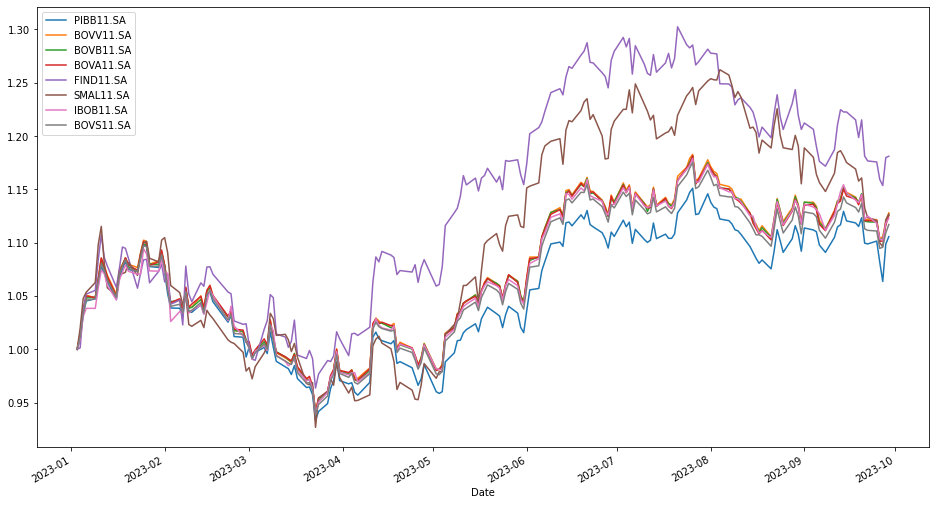

In [95]:
desempenhos_top8_etfs.plot(figsize=(16,9));

# TODO

#### TODO: simular uma carteira com ETFs e outros ativos e fazer o backtest com a vectorbt, tentar ver o nível de risco da carteira com e sem ETFs

In [96]:
ativos_etfs = list(desempenhos_top8_etfs.mean().sort_values(ascending = False).index)

Critério de seleção de ações: Ativos da carteira recomendada do Valor Economico

Fonte de dados: https://infograficos.valor.globo.com/carteira-valor/historico/9/2023


In [102]:
url = 'https://infograficos.valor.globo.com/carteira-valor/historico/9/2023'

In [104]:
soup = BeautifulSoup(url, 'html.parser')

In [158]:
df_ativos = pd.read_html(str(soup), encoding='utf-8')[0]

In [160]:
df_ativos.drop(df_ativos.index[10], inplace=True)

In [161]:
df_ativos

,NomeNome/Código,Código,Indicações,Variação no mêsVar. Mês
0,VALE ONVALE3,VALE3,5,"+3,84%"
1,GERDAU PNGGBR4,GGBR4,5,"-6,65%"
2,BTGP BANCO UNTBPAC11,BPAC11,4,"-4,31%"
3,BB SEGURIDADE ONBBSE3,BBSE3,4,"+2,73%"
4,ITAÚ UNIBANCO PNITUB4,ITUB4,3,"+0,09%"
5,PETRO RIO ONPRIO3,PRIO3,3,"+1,34%"
6,WEG ONWEGE3,WEGE3,3,"+1,24%"
7,JBS ONJBSS3,JBSS3,3,"-1,90%"
8,MULTIPLAN ONMULT3,MULT3,3,"+0,05%"
9,COPEL PNBCPLE6,CPLE6,3,"+3,46%"


In [162]:
df_ativos.set_index('Código', inplace=True)

In [164]:
list(df_ativos.index)

['VALE3',
 'GGBR4',
 'BPAC11',
 'BBSE3',
 'ITUB4',
 'PRIO3',
 'WEGE3',
 'JBSS3',
 'MULT3',
 'CPLE6']

In [167]:
ativos_acoes = [i + '.SA' for i in list(df_ativos.index)]

In [168]:
ativos = ativos_acoes + ativos_etfs

In [169]:
ativos

['VALE3.SA',
 'GGBR4.SA',
 'BPAC11.SA',
 'BBSE3.SA',
 'ITUB4.SA',
 'PRIO3.SA',
 'WEGE3.SA',
 'JBSS3.SA',
 'MULT3.SA',
 'CPLE6.SA',
 'FIND11.SA',
 'SMAL11.SA',
 'BOVV11.SA',
 'BOVA11.SA',
 'BOVB11.SA',
 'IBOB11.SA',
 'BOVS11.SA',
 'PIBB11.SA']

Vamos dividir o dataset em 2, para fazer uma análise de out of samples

In [185]:
portfolio_value = 20000

In [174]:
carteira_etf_acoes = yf.download(ativos ,start = '2023-01-01', end='2023-05-01')['Adj Close']
carteira_etf_acoes = carteira_etf_acoes.dropna()
carteira_etf_acoes.head()

[*********************100%***********************]  18 of 18 completed


,BBSE3.SA,BOVA11.SA,BOVB11.SA,BOVS11.SA,BOVV11.SA,BPAC11.SA,CPLE6.SA,FIND11.SA,GGBR4.SA,IBOB11.SA,ITUB4.SA,JBSS3.SA,MULT3.SA,PIBB11.SA,PRIO3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,
2023-01-02,30.109886,102.629997,107.129997,82.080002,107.400002,21.958847,7.64,95.949997,26.808254,85.639999,23.629482,20.307829,20.099333,187.020004,36.759998,93.800003,84.917046,37.565430
2023-01-03,29.172049,100.480003,104.800003,80.389999,105.099998,20.908983,7.50,93.000000,26.862852,84.300003,23.137402,19.872322,19.458796,183.330002,34.299999,90.199997,84.765060,36.628761
2023-01-04,29.316332,101.919998,106.080002,81.309998,106.739998,21.576189,7.71,93.129997,26.735455,85.070000,23.204937,20.165815,19.788769,185.110001,34.090000,92.000000,84.917046,36.875256
2023-01-05,29.379459,104.269997,108.419998,83.080002,108.830002,22.453070,7.65,96.339996,27.390646,86.889999,23.928587,20.923218,20.312845,189.350006,34.970001,94.500000,86.341820,36.954132
2023-01-06,30.236130,105.500000,109.839996,84.089996,110.430000,22.581488,7.54,97.820000,27.599941,87.540001,24.343479,21.027359,20.856333,191.649994,35.180000,95.029999,87.709610,37.496414


In [181]:
#out of samples
df_out = yf.download(ativos, start='2023-05-02')['Adj Close']
df_out = df_out.dropna()
df_out.tail()

[*********************100%***********************]  18 of 18 completed


,BBSE3.SA,BOVA11.SA,BOVB11.SA,BOVS11.SA,BOVV11.SA,BPAC11.SA,CPLE6.SA,FIND11.SA,GGBR4.SA,IBOB11.SA,ITUB4.SA,JBSS3.SA,MULT3.SA,PIBB11.SA,PRIO3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,
2023-09-25,32.029999,112.570000,117.300003,89.309998,117.879997,30.900000,9.11,109.339996,24.400000,94.260002,27.000000,18.110001,24.253443,201.940002,46.980000,101.099998,66.599998,36.130001
2023-09-26,31.830000,110.650002,115.550003,88.000000,116.010002,30.209999,8.98,107.820000,24.430000,93.040001,26.600000,17.840000,23.584110,198.320007,46.930000,99.199997,65.559998,36.080002
2023-09-27,31.469999,110.699997,115.690002,88.089996,116.199997,29.889999,8.72,107.279999,24.450001,92.930000,26.549999,17.670000,23.683945,195.000000,48.299999,98.889999,65.699997,36.020000
2023-09-28,31.700001,112.180000,117.120003,89.160004,117.720001,30.719999,8.93,109.720001,24.299999,94.250000,27.250000,17.780001,24.150000,201.410004,47.240002,101.150002,66.699997,36.389999
2023-09-29,31.209999,113.150002,117.959999,89.800003,118.550003,31.070000,8.96,109.839996,24.129999,94.660004,27.209999,18.049999,24.570000,202.699997,47.040001,101.639999,67.580002,36.270000


Para determinar os pesos de cada ativo na carteira, vamos usar o método da fronteira eficiente de Markowitz.

## Fronteira Eficiente - Markowitz

In [184]:
mean = expected_returns.mean_historical_return(carteira_etf_acoes)

s = CovarianceShrinkage(carteira_etf_acoes).ledoit_wolf()

In [186]:
corr = s.corr()
corr.style.background_gradient(cmap='coolwarm', axis = None).format(precision=2)

,BBSE3.SA,BOVA11.SA,BOVB11.SA,BOVS11.SA,BOVV11.SA,BPAC11.SA,CPLE6.SA,FIND11.SA,GGBR4.SA,IBOB11.SA,ITUB4.SA,JBSS3.SA,MULT3.SA,PIBB11.SA,PRIO3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
BBSE3.SA,1.00,0.24,0.24,0.24,0.24,0.37,0.13,0.46,-0.09,0.26,0.38,-0.18,0.44,0.17,0.30,0.20,-0.43,-0.13
BOVA11.SA,0.24,1.00,0.98,0.98,0.98,0.91,0.44,0.85,0.30,0.96,0.75,0.32,0.68,0.97,0.44,0.93,0.19,0.07
BOVB11.SA,0.24,0.98,1.00,0.99,0.98,0.93,0.42,0.86,0.30,0.97,0.76,0.34,0.66,0.97,0.42,0.92,0.19,0.09
BOVS11.SA,0.24,0.98,0.99,1.00,0.98,0.93,0.42,0.86,0.31,0.97,0.76,0.34,0.66,0.97,0.42,0.92,0.20,0.09
BOVV11.SA,0.24,0.98,0.98,0.98,1.00,0.92,0.45,0.85,0.30,0.97,0.75,0.32,0.68,0.96,0.43,0.92,0.19,0.09
BPAC11.SA,0.37,0.91,0.93,0.93,0.92,1.00,0.30,0.88,0.20,0.93,0.78,0.43,0.62,0.88,0.26,0.86,0.11,0.21
CPLE6.SA,0.13,0.44,0.42,0.42,0.45,0.30,1.00,0.43,-0.15,0.37,0.36,-0.34,0.60,0.33,0.40,0.39,-0.35,0.13
FIND11.SA,0.46,0.85,0.86,0.86,0.85,0.88,0.43,1.00,0.08,0.82,0.95,0.24,0.70,0.79,0.32,0.78,-0.14,0.11
GGBR4.SA,-0.09,0.30,0.30,0.31,0.30,0.20,-0.15,0.08,1.00,0.31,0.11,0.11,-0.04,0.41,-0.04,0.31,0.76,-0.42
IBOB11.SA,0.26,0.96,0.97,0.97,0.97,0.93,0.37,0.82,0.31,1.00,0.71,0.36,0.63,0.95,0.44,0.90,0.20,0.12


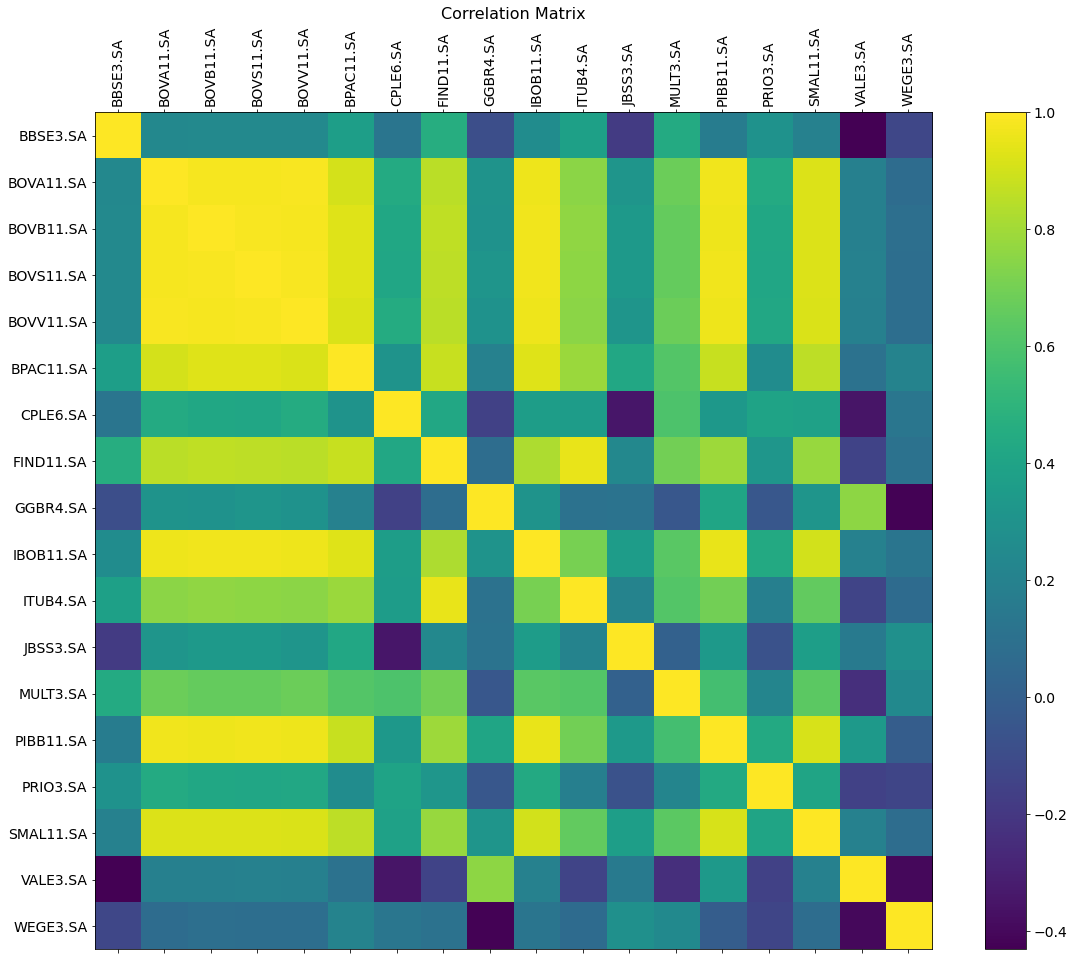

In [187]:
f = plt.figure(figsize=(19, 15))
plt.matshow(s.corr(), fignum=f.number)
plt.xticks(range(s.select_dtypes(['number']).shape[1]), s.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(s.select_dtypes(['number']).shape[1]), s.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [189]:
exp_return = expected_returns.mean_historical_return(carteira_etf_acoes)
exp_return

BBSE3.SA     0.303412
BOVA11.SA   -0.054810
BOVB11.SA   -0.054934
BOVS11.SA   -0.062417
BOVV11.SA   -0.051827
BPAC11.SA    0.188816
CPLE6.SA     0.174628
FIND11.SA    0.178407
GGBR4.SA    -0.284046
IBOB11.SA   -0.037820
ITUB4.SA     0.262244
JBSS3.SA    -0.451137
MULT3.SA     1.135049
PIBB11.SA   -0.107732
PRIO3.SA    -0.170099
SMAL11.SA   -0.159849
VALE3.SA    -0.465978
WEGE3.SA     0.318314
dtype: float64

Nota da documentação da biblioteca [Pyportfolioopt](https://pyportfolioopt.readthedocs.io/en/latest/MeanVariance.html?highlight=gamma#:~:text=Note-,In%20practice%2C,.,-References):
- In practice, γ must be tuned to achieve the level of regularisation that you want. However, if the universe of assets is small (less than 20 assets), then gamma=1 is a good starting point. For larger universes, or if you want more non-negligible weights in the final portfolio, increase gamma. 

In [193]:
#Sharp ratio

ef = EfficientFrontier(mean, s)

ef.add_objective(objective_functions.L2_reg, gamma = 1)

w = ef.max_sharpe()

cleaned_weights  = ef.clean_weights()
cleaned_weights_ = cleaned_weights.values()
cleaned_weights_ = list(cleaned_weights_)
cleaned_weights_ = np.array(cleaned_weights_)

print(cleaned_weights)

OrderedDict([('BBSE3.SA', 0.12457), ('BOVA11.SA', 0.0), ('BOVB11.SA', 0.0), ('BOVS11.SA', 0.0), ('BOVV11.SA', 0.0), ('BPAC11.SA', 0.02389), ('CPLE6.SA', 0.04664), ('FIND11.SA', 0.03827), ('GGBR4.SA', 0.0), ('IBOB11.SA', 0.0), ('ITUB4.SA', 0.08611), ('JBSS3.SA', 0.0), ('MULT3.SA', 0.54437), ('PIBB11.SA', 0.0), ('PRIO3.SA', 0.0), ('SMAL11.SA', 0.0), ('VALE3.SA', 0.0), ('WEGE3.SA', 0.13614)])


In [194]:
ef.portfolio_performance(verbose=True)

Expected annual return: 74.1%
Annual volatility: 24.0%
Sharpe Ratio: 3.01


(0.7410880871976055, 0.2395912609868485, 3.0096593850190017)

In [195]:
latest_prices = get_latest_prices(carteira_etf_acoes)
da = DiscreteAllocation(w, latest_prices, total_portfolio_value=portfolio_value)
allocation, leftover = da.lp_portfolio()
print('Qtd ações alocadas: ',allocation)
print('Sobrou: R$',leftover)

Qtd ações alocadas:  {'BBSE3.SA': 76, 'BPAC11.SA': 20, 'CPLE6.SA': 116, 'FIND11.SA': 8, 'ITUB4.SA': 68, 'MULT3.SA': 431, 'WEGE3.SA': 66}
Sobrou: R$ 13.756817720503022


In [209]:
allocation_df = pd.DataFrame.from_dict(allocation, orient='index', columns=['Quantidade']).sort_values(by='Quantidade', ascending=False).reset_index().set_index('index')

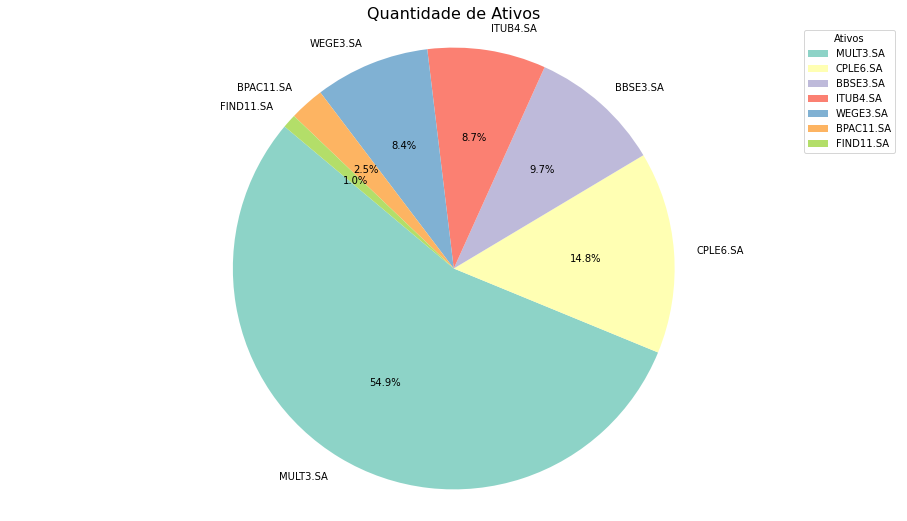

In [226]:
plt.figure(figsize=(16, 9), facecolor='white')

cores = sns.color_palette('Set3', n_colors=7)
plt.pie(allocation_df['Quantidade'], labels=allocation_df.index, autopct='%1.1f%%', startangle=140, colors=cores)

plt.axis('equal')  # Isso garante que o gráfico seja desenhado como um círculo.

plt.title('Quantidade de Ativos', fontsize=16)
plt.legend(allocation_df.index, title="Ativos", loc="best")


plt.show()